In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_posted_month_no'>

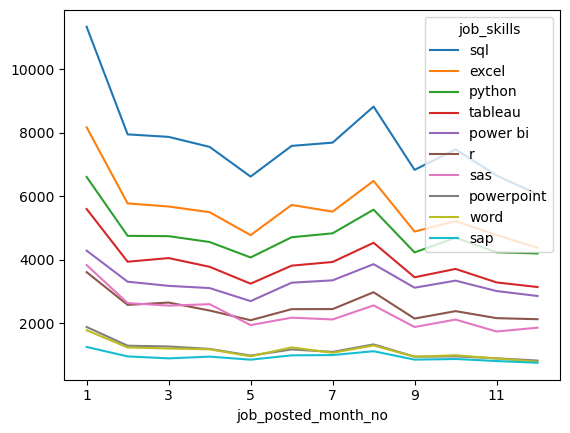

In [42]:
df['job_posted_month_no'] = df['job_posted_date'].dt.month
df_exploded = df.explode("job_skills")
df_exploded_DA = df_exploded[df_exploded['job_title_short'] == 'Data Analyst']
df_pivot = df_exploded_DA.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc="size", fill_value=0)
df_pivot.loc['Total'] = df_pivot.sum()
indexes = df_pivot.loc['Total'].sort_values(ascending=False).head(10).index
df_updated = df_pivot.loc[:,indexes]


df_updated = df_updated.drop('Total')
df_updated.reset_index()
#df_updated['month_name'] = df_updated['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, '%m').strftime('%B'))
df_updated

df_updated.plot(kind='line')

